In [11]:


import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp



In [2]:
# get all files from the instances folder
files = os.listdir('instances')
files

['att48.tsp',
 'berlin52.tsp',
 'brazil58.tsp',
 'burma14.tsp',
 'dantzig42.tsp',
 'eil101.tsp',
 'eil51.tsp',
 'eil76.tsp',
 'gr48.tsp',
 'gr96.tsp',
 'hk48.tsp',
 'kroA100.tsp',
 'kroB100.tsp',
 'kroC100.tsp',
 'kroD100.tsp',
 'kroE100.tsp',
 'lin105.tsp',
 'pr107.tsp',
 'pr76.tsp',
 'rat99.tsp',
 'rd100.tsp',
 'st70.tsp',
 'swiss42.tsp']

In [3]:
# create a dict that will be turned into a dataframe later the keys should be:
# file, n, m, ratio1, ratio2, density, min, max, mean, median, Q25, Q75, std, var
datadict = {'file': [], 'n': [], 'm': [], 'ratio1': [], 'ratio2': [], 'density': [], 'min': [], 'max': [], 'mean': [], 'std': [], 'var': []}

In [4]:
# for all files in the instances folder make a graph and get information such as mean, std, min, max
for f in files:
    problem = tsplib95.load('Instances/' + f)
    graph = problem.get_graph()
    dist_matrix = nx.to_numpy_matrix(graph)

    # get the number of nodes
    n = len(graph.nodes)

    # get the number of edges
    m = len(graph.edges)

    # get the ratio of nodes to edges and vice versa
    ratio1 = n/m
    ratio2 = m/n
    # get the density of the graph
    density = nx.density(graph)

    # get the min, max, mean, median, Q25, Q75, std, var of the distances
    emin = np.min(dist_matrix)
    emax = np.max(dist_matrix)

    mean = np.mean(dist_matrix)


    #Q25 = np.quantile(dist_matrix, 0.25)
    #Q75 = np.quantile(dist_matrix, 0.75)
    std = np.std(dist_matrix)

    var = np.var(dist_matrix)


    # add the information to the dict
    datadict['file'].append(f)
    datadict['n'].append(n)
    datadict['m'].append(m)
    datadict['ratio1'].append(ratio1)
    datadict['ratio2'].append(ratio2)
    datadict['density'].append(density)
    datadict['min'].append(emin)
    datadict['max'].append(emax)
    datadict['mean'].append(mean)

    #datadict['Q25'].append(Q25)
    #datadict['Q75'].append(Q75)
    datadict['std'].append(std)
    datadict['var'].append(var)




In [5]:
# turn the dict into a dataframe
df = pd.DataFrame.from_dict(datadict)
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06


In [6]:
# add columns for the algorithms GRASP, GILS and DBMEA
df['GILS_cost'] = 0
df['GILS_time'] = 0
df['GRASP_cost'] = 0
df['GRASP_time'] = 0
df['DBMEA_cost'] = 0
df['DBMEA_time'] = 0

In [7]:
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,0,0,0,0,0,0
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,0,0,0,0,0,0
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,0,0,0,0,0,0
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,0,0,0,0,0,0
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,0,0,0,0,0,0
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,0,0,0,0,0,0
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,0,0,0,0,0,0
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,0,0,0,0,0,0
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,0,0,0,0,0,0
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06,0,0,0,0,0,0


In [9]:
# create a function that can be used via df.apply that runs the 3 algorithmms on the given file from the row

def benchmark(row):
    # get the file
    f = row['file']

    _, gils_cost, gils_time = gilsrvnd.run(f)
    _, grasp_cost, grasp_time = grasp.run(f)
    _, dbmea_cost, dbmea_time = DBMEA.run(f)

    # add the results to the dataframe

    row['GRASP_cost'] = grasp_cost
    row['GRASP_time'] = grasp_time

    row['GILS_cost'] = gils_cost
    row['GILS_time'] = gils_time
    row['DBMEA_cost'] = dbmea_cost
    row['DBMEA_time'] = dbmea_time

    print(f'{f} done')

    return row


In [12]:
# run the benchmark function on all rows
df = df.apply(benchmark, axis=1)
df


My program took 6.50851035118103 to run
My program took 0.0254364013671875 to run
cost best 204827.0 0
My program took 5.225767135620117 to run
att48.tsp done
My program took 6.317056179046631 to run
My program took 0.030544519424438477 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 142564.0 0
My program took 5.499347686767578 to run
berlin52.tsp done


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

My program took 8.968650817871094 to run
My program took 0.043077945709228516 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 529189.0 0
My program took 9.10741901397705 to run
brazil58.tsp done
My program took 0.30844926834106445 to run
My program took 0.0010004043579101562 to run
cost best 16985.0 0
My program took 0.22256064414978027 to run
burma14.tsp done
My program took 3.398385524749756 to run
My program took 0.01603102684020996 to run
cost best 11945.0 0
My program took 3.3435471057891846 to run
dantzig42.tsp done
My program took 32.83341383934021 to run
My program took 0.22228074073791504 to run
cost best 29990.0 0
My program took 72.6964385509491 to run
eil101.tsp done
My program took 3.625241994857788 to run
My program took 0.029571056365966797 to run
cost best 10286.0 0
My program took 6.586362361907959 to run
eil51.tsp done
My program took 15.74213719367981 to run
My program took 0.09564495086669922 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 18804.0 0
My program took 24.95725178718567 to run
eil76.tsp done


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

My program took 4.773008584976196 to run
My program took 0.024019241333007812 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 100626.0 0
My program took 3.3799142837524414 to run
gr48.tsp done
My program took 30.8424711227417 to run
My program took 0.19649147987365723 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


cost best 2255353.0 0
My program took 40.24398994445801 to run
gr96.tsp done


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

My program took 4.659875392913818 to run
My program took 0.02451920509338379 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 244152.0 0
My program took 5.976395845413208 to run
hk48.tsp done
My program took 42.87683963775635 to run
My program took 0.211181640625 to run
cost best 1063291.0 0
My program took 79.4624855518341 to run
kroA100.tsp done
My program took 48.5152108669281 to run
My program took 0.21442937850952148 to run
cost best 1050373.0 0
My program took 54.9681236743927 to run
kroB100.tsp done
My program took 38.923420667648315 to run
My program took 0.2096693515777588 to run
cost best 1022182.0 0
My program took 70.92769050598145 to run
kroC100.tsp done
My program took 48.463627099990845 to run
My program took 0.22528839111328125 to run
cost best 1052683.0 0
My program took 71.74382591247559 to run
kroD100.tsp done
My program took 41.30372738838196 to run
My program took 0.2108466625213623 to run
cost best 1061409.0 0
My program took 57.178866386413574 to run
kroE100.tsp done
My program took 37.23751902580261 to run
My program took 0.2545292377471924 to run
cost best 681550.0 0
My prog

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

My program took 16.10330867767334 to run
st70.tsp done


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

My program took 3.1156558990478516 to run
My program took 0.01703190803527832 to run


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

cost best 22216.0 0
My program took 2.429354429244995 to run
swiss42.tsp done


,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,222779.0,6.509766,311086.0,0.025436,204827.0,5.225767
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,149458.0,6.318057,191450.0,0.030545,142564.0,5.499348
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,548290.0,8.969651,712437.0,0.043078,529189.0,9.107419
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16164.0,0.308449,18393.0,0.001000,16985.0,0.222561
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12121.0,3.398386,14005.0,0.016031,11945.0,3.343547
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,30047.0,32.833414,45502.0,0.222281,29990.0,72.696439
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,10568.0,3.625242,12385.0,0.029571,10286.0,6.586362
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,20042.0,15.742137,26419.0,0.095645,18804.0,24.958252
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,107226.0,4.774009,152779.0,0.024019,100626.0,3.379914
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06,2233427.0,30.842471,3985381.0,0.196491,2255353.0,40.243990


In [147]:
# save the dataframe as a csv
# df.to_csv('data.csv', index=False)

In [13]:
matrix = df.copy()
matrix

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,222779.0,6.509766,311086.0,0.025436,204827.0,5.225767
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,149458.0,6.318057,191450.0,0.030545,142564.0,5.499348
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,548290.0,8.969651,712437.0,0.043078,529189.0,9.107419
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16164.0,0.308449,18393.0,0.001000,16985.0,0.222561
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12121.0,3.398386,14005.0,0.016031,11945.0,3.343547
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,30047.0,32.833414,45502.0,0.222281,29990.0,72.696439
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,10568.0,3.625242,12385.0,0.029571,10286.0,6.586362
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,20042.0,15.742137,26419.0,0.095645,18804.0,24.958252
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,107226.0,4.774009,152779.0,0.024019,100626.0,3.379914
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06,2233427.0,30.842471,3985381.0,0.196491,2255353.0,40.243990


In [14]:
c = ["GILS_cost", "GRASP_cost", "DBMEA_cost"]
matrix[c] = matrix[c].apply(lambda x: pd.to_numeric(x, errors='coerce'))

matrix['Min_val'] = matrix[c].min(axis=1)
matrix['Min_col'] = matrix[c].idxmin(axis=1)

In [15]:
matrix

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,Min_val,Min_col
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,222779.0,6.509766,311086.0,0.025436,204827.0,5.225767,204827.0,DBMEA_cost
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,149458.0,6.318057,191450.0,0.030545,142564.0,5.499348,142564.0,DBMEA_cost
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,548290.0,8.969651,712437.0,0.043078,529189.0,9.107419,529189.0,DBMEA_cost
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16164.0,0.308449,18393.0,0.001000,16985.0,0.222561,16164.0,GILS_cost
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12121.0,3.398386,14005.0,0.016031,11945.0,3.343547,11945.0,DBMEA_cost
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,30047.0,32.833414,45502.0,0.222281,29990.0,72.696439,29990.0,DBMEA_cost
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,10568.0,3.625242,12385.0,0.029571,10286.0,6.586362,10286.0,DBMEA_cost
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,20042.0,15.742137,26419.0,0.095645,18804.0,24.958252,18804.0,DBMEA_cost
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,107226.0,4.774009,152779.0,0.024019,100626.0,3.379914,100626.0,DBMEA_cost
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06,2233427.0,30.842471,3985381.0,0.196491,2255353.0,40.243990,2233427.0,GILS_cost


In [16]:
#save the dataframe as a csv
#matrix.to_csv('matrix_1.csv', index=False)

In [148]:
# train a model on the data that predicts gils


In [17]:
# get the data
df = pd.read_csv('matrix_1.csv')
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,Min_val,Min_col
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,222779.0,6.509766,311086.0,0.025436,204827.0,5.225767,204827.0,DBMEA_cost
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,149458.0,6.318057,191450.0,0.030545,142564.0,5.499348,142564.0,DBMEA_cost
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,548290.0,8.969651,712437.0,0.043078,529189.0,9.107419,529189.0,DBMEA_cost
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16164.0,0.308449,18393.0,0.001000,16985.0,0.222561,16164.0,GILS_cost
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12121.0,3.398386,14005.0,0.016031,11945.0,3.343547,11945.0,DBMEA_cost
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,30047.0,32.833414,45502.0,0.222281,29990.0,72.696439,29990.0,DBMEA_cost
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,10568.0,3.625242,12385.0,0.029571,10286.0,6.586362,10286.0,DBMEA_cost
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,20042.0,15.742137,26419.0,0.095645,18804.0,24.958252,18804.0,DBMEA_cost
8,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,107226.0,4.774009,152779.0,0.024019,100626.0,3.379914,100626.0,DBMEA_cost
9,gr96.tsp,96,4656,0.020619,48.5,1.021053,1.0,9850.0,3821.365234,1984.491419,3.938206e+06,2233427.0,30.842471,3985381.0,0.196491,2255353.0,40.243990,2233427.0,GILS_cost


In [19]:
# get the features
X = df[['n', 'm', 'ratio1', 'ratio2', 'density', 'min', 'max', 'mean', 'std', 'var']]
y = df['Min_col']



In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [21]:
# train a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [22]:
# get the predictions
y_pred = rf.predict(X_test)



In [23]:
# get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.5

In [24]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(3, 3, 0, 0)

In [25]:
# predict the entire dataset
y_pred = rf.predict(X)


In [26]:
# get the accuracy
accuracy_score(y, y_pred)


0.8695652173913043

In [27]:
# get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(11, 3, 0, 9)

In [28]:
# now train a logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\User\PycharmProjects\TRP\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# get the predictions
y_pred = lr.predict(X_test)


In [30]:
# get the accuracy
accuracy_score(y_test, y_pred)

0.3333333333333333

In [31]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(2, 4, 0, 0)

In [32]:
#get the predictions for the entire dataset
y_pred = lr.predict(X)


In [33]:
# get the accuracy
accuracy_score(y, y_pred)

0.6521739130434783

In [34]:
# get the confusion matrix

In [35]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(9, 5, 3, 6)

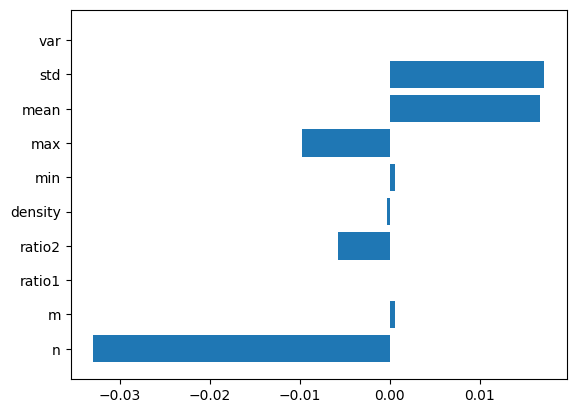

In [36]:
# display the logistic regression
import matplotlib.pyplot as plt
plt.barh(X.columns, lr.coef_[0])
plt.show()

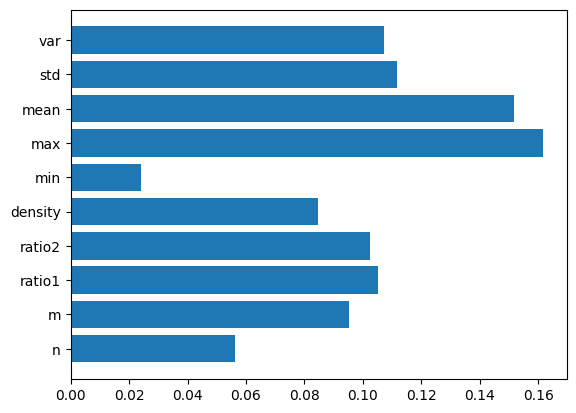

In [37]:
# display the random forest
plt.barh(X.columns, rf.feature_importances_)
plt.show()